#CS471: Assignment 4 Decision Tree Classification
Aiman Madan
www.ai-man.info

https://colab.research.google.com/drive/1HmKPxPsPMHxzK3l_5udVyVisy1mkjD1r?usp=sharing


In [ ]:
# Directly load the dataset using sklearn
from sklearn.datasets import load_iris

# Third Party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# 1- Include a basic description of the data (what are the features and labels)


In [ ]:
iris = load_iris()

df = pd.DataFrame(iris["data"], columns=iris["feature_names"])

df["target"] = iris["target"]

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



- The **features** showen are the **sepal length**, **sepal width**, **petal length**, and **petal width**.

- The **Labels** showen are iris plants: 0 **Iris Setosa**, 1 **Iris Versicolour**, 2 **Iris Virginica**.

# Write in your own words of what the classification task is and why a decision tree is a reasonable model to try for this data.

 - We are supposed to identify the species of Iris plant by given features (measurements in cm).

 - A decision tree is reasoable because it will compare the plants based on the given features and then help us decide which plant is which.



# 2- Split the data into training, validation, and testing set.

In [ ]:
X = iris.data
y = iris.target

# Split the data: 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=40)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40)

# Print the sizes of each dataset
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))


Training set size: 90
Validation set size: 30
Testing set size: 30


# 3- Fit a decision tree on the training dataset.

Validation Accuracy: 1.00
Test Accuracy: 1.00


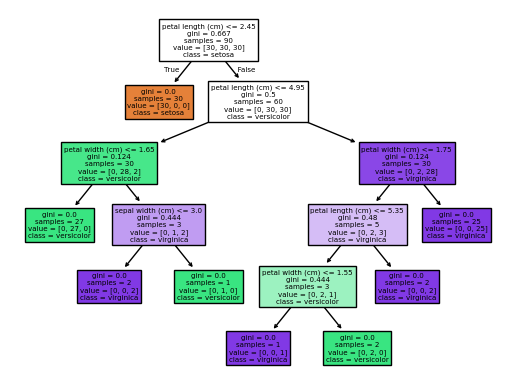

In [ ]:
# Initialize the Decision Tree
clf = DecisionTreeClassifier(random_state=40)

# Train the model on the training data
clf.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Evaluate on the test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot the decision tree
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


# 4- Tune at least 2 hyperparameters in the decision tree model (https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e) based on the performance on the validation set or using cross-validation. One hyperparameter has to be max_depth and the other one is your choice. Generate plot of hyperparameter values vs performance metric.

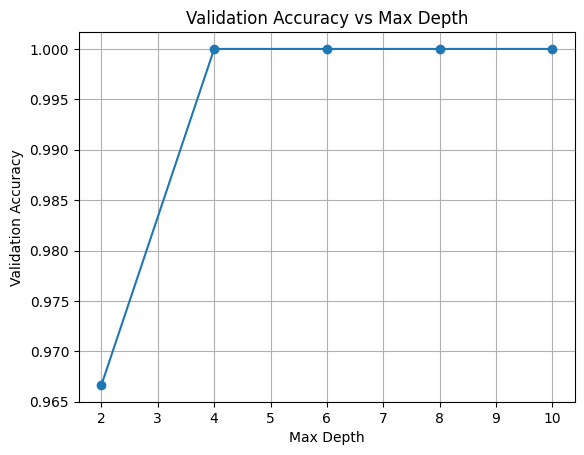

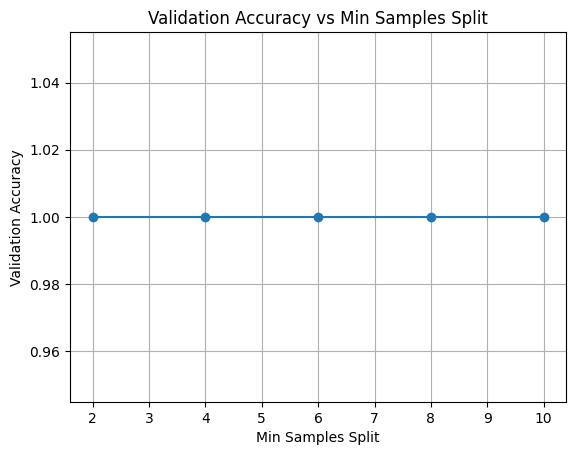

In [ ]:

val_accuracies_depth = []  # Store accuracy for different depths
val_accuracies_split = []  # Store accuracy for different splits

max_depths = [2, 4, 6, 8, 10]
min_samples_splits = [2, 4, 6, 8, 10]

# max_depth hyperparameter
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=40)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies_depth.append(val_accuracy)


plt.plot(max_depths, val_accuracies_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Max Depth')
plt.grid(True)
plt.show()



# min_sample_split hyperparameter
for split in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split=split, random_state=40)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies_split.append(val_accuracy)



plt.plot(min_samples_splits, val_accuracies_split, marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Min Samples Split')
plt.grid(True)
plt.show()



# 5-Train the model using optimal hyperparameters (found in step 5) on the train + validation data. Test it on test data and generate a classification report

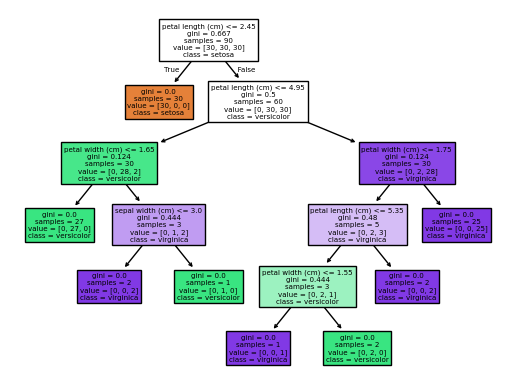

Classification Report on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Test Accuracy: 1.00


In [ ]:

# set optimal hyperparameters
optimal_max_depth = 6
optimal_min_samples_split = 2

# Combine training and validation data
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.hstack((y_train, y_val))

# Train the model using optimal hyperparameters
model = DecisionTreeClassifier(
    max_depth=optimal_max_depth,
    min_samples_split=optimal_min_samples_split,
    random_state=50
)

model.fit(X_train_val, y_train_val)

# Test the model on the test data
y_test_pred = model.predict(X_test)


# Print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plot the decision tree

plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()



# Generate and print the classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


print(f"Test Accuracy: {test_accuracy:.2f}")
